<a href="https://colab.research.google.com/github/wepsboltmozey/artificail-eye/blob/main/accident_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing neccessary librararies

In [ ]:
import tensorflow as tf
import os, shutil, pathlib
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers

connecting  google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/accident.zip" -d "/content/datasets/"


Archive:  /content/drive/MyDrive/accident.zip
  inflating: /content/datasets/data/test/Accident/acc1 (7).jpg  
  inflating: /content/datasets/data/test/Accident/test10_33.jpg  
  inflating: /content/datasets/data/test/Accident/test10_56.jpg  
  inflating: /content/datasets/data/test/Accident/test10_61.jpg  
  inflating: /content/datasets/data/test/Accident/test12_13.jpg  
  inflating: /content/datasets/data/test/Accident/test12_16.jpg  
  inflating: /content/datasets/data/test/Accident/test13_22.jpg  
  inflating: /content/datasets/data/test/Accident/test15_15.jpg  
  inflating: /content/datasets/data/test/Accident/test18_22.jpg  
  inflating: /content/datasets/data/test/Accident/test18_24.jpg  
  inflating: /content/datasets/data/test/Accident/test19_26.jpg  
  inflating: /content/datasets/data/test/Accident/test1_18.jpg  
  inflating: /content/datasets/data/test/Accident/test1_20.jpg  
  inflating: /content/datasets/data/test/Accident/test1_24.jpg  
  inflating: /content/datasets/dat

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/datasets/data/train/',
    seed=101,
    image_size= (img_height, img_width),shuffle=True,
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/datasets/data/test/',
    seed=101,
    image_size= (img_height, img_width), shuffle=True,
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
   '/content/datasets/data/val/',
    seed=101,
    image_size= (img_height, img_width),shuffle=True,
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

defining our pretrained model

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


data augmentation

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

model

In [ ]:

model = tf.keras.Sequential([
    # data_augmentation,
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
model.build(input_shape=(None, 250, 250, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          368672    
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 Fitting the model using a Dataset

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="/content/accident_conn.keras",
 save_best_only=True,
 monitor="val_loss")
]


history = model.fit(
 train_dataset,
 epochs=100,
 validation_data=val_dataset,
 callbacks=callbacks)


Epoch 1/100
8/8 [==============================] - 27s 1s/step - loss: 0.8404 - accuracy: 0.5171 - val_loss: 0.6536 - val_accuracy: 0.5918
Epoch 2/100
8/8 [==============================] - 2s 258ms/step - loss: 0.5762 - accuracy: 0.6839 - val_loss: 0.4765 - val_accuracy: 0.8163
Epoch 3/100
8/8 [==============================] - 2s 258ms/step - loss: 0.4171 - accuracy: 0.8205 - val_loss: 0.4003 - val_accuracy: 0.8571
Epoch 4/100
8/8 [==============================] - 2s 264ms/step - loss: 0.2848 - accuracy: 0.8976 - val_loss: 0.3373 - val_accuracy: 0.8469
Epoch 5/100
8/8 [==============================] - 2s 313ms/step - loss: 0.1890 - accuracy: 0.9393 - val_loss: 0.2192 - val_accuracy: 0.9082
Epoch 6/100
8/8 [==============================] - 2s 264ms/step - loss: 0.1245 - accuracy: 0.9558 - val_loss: 0.1645 - val_accuracy: 0.9490
Epoch 7/100
8/8 [==============================] - 1s 166ms/step - loss: 0.0788 - accuracy: 0.9709 - val_loss: 0.2186 - val_accuracy: 0.9286
Epoch 8/100
8/8

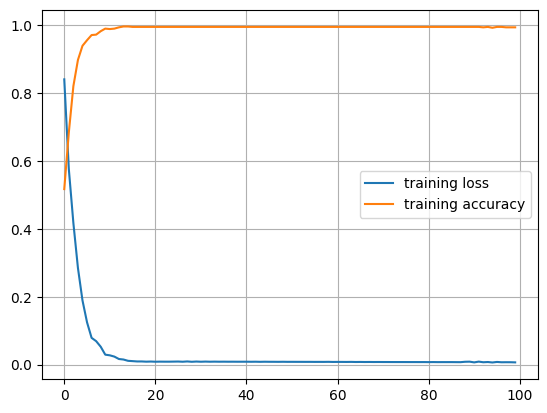

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

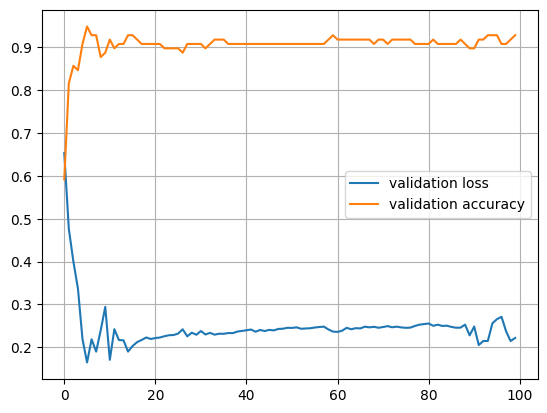

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

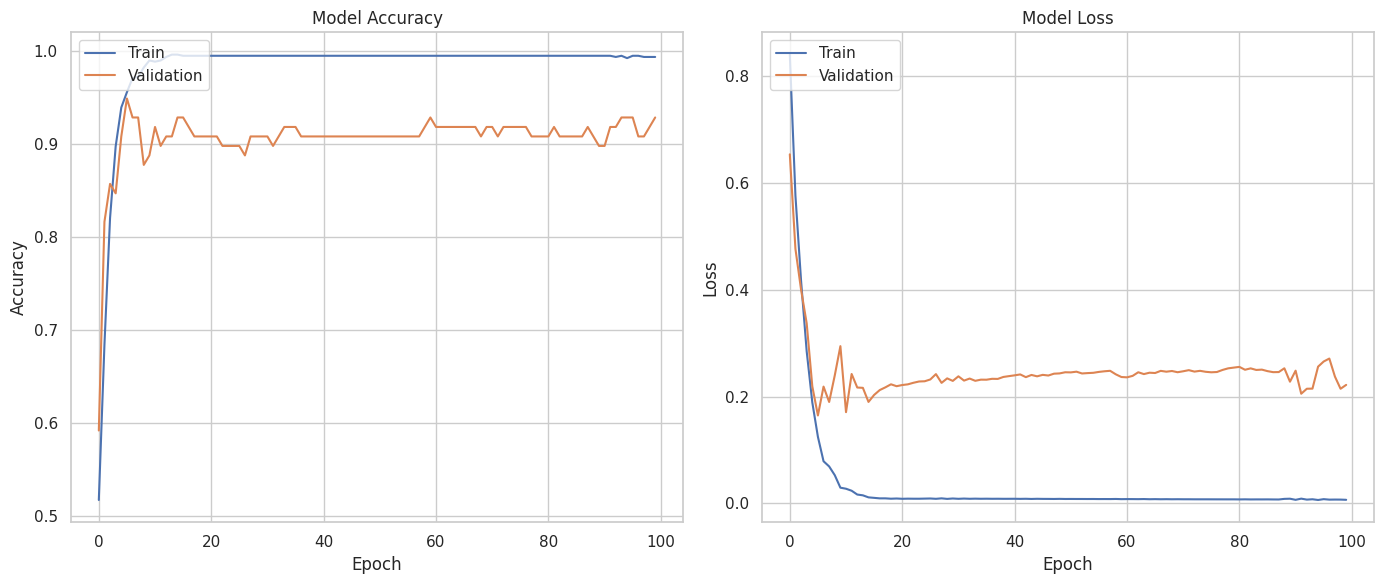

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set(style='whitegrid', context='notebook')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 [==============================] - 4s 4s/step


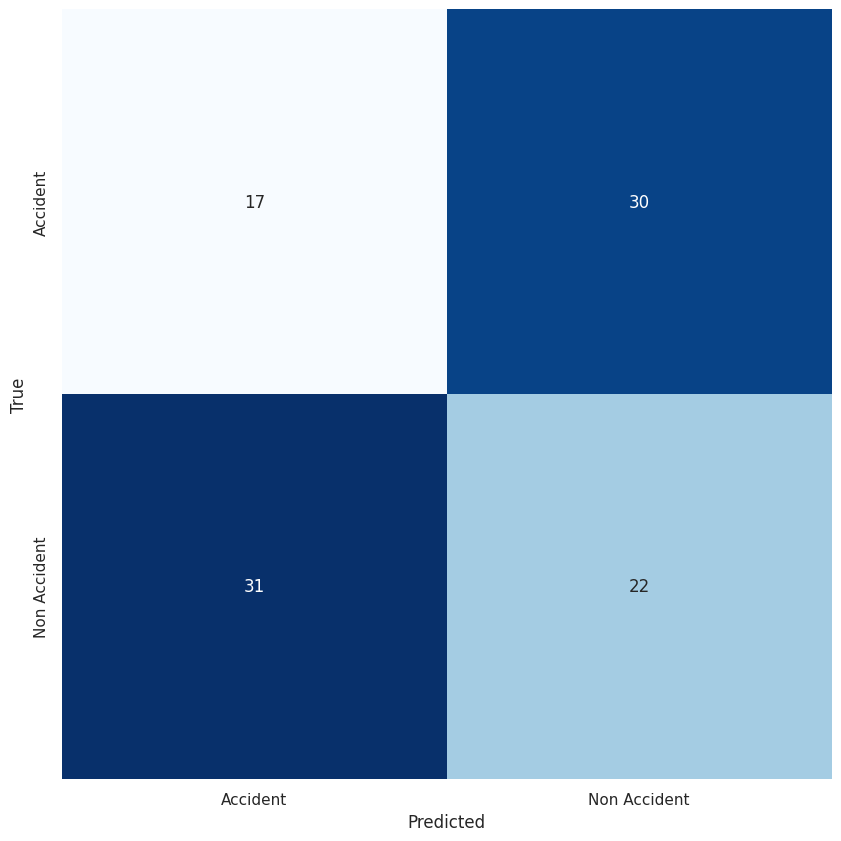

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = np.concatenate([y for x, y in testing_ds])

y_pred = model.predict(testing_ds)
y_pred = np.argmax(y_pred, axis=1) # Convert probabilities to class indices

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4/4 [==============================] - 0s 66ms/step


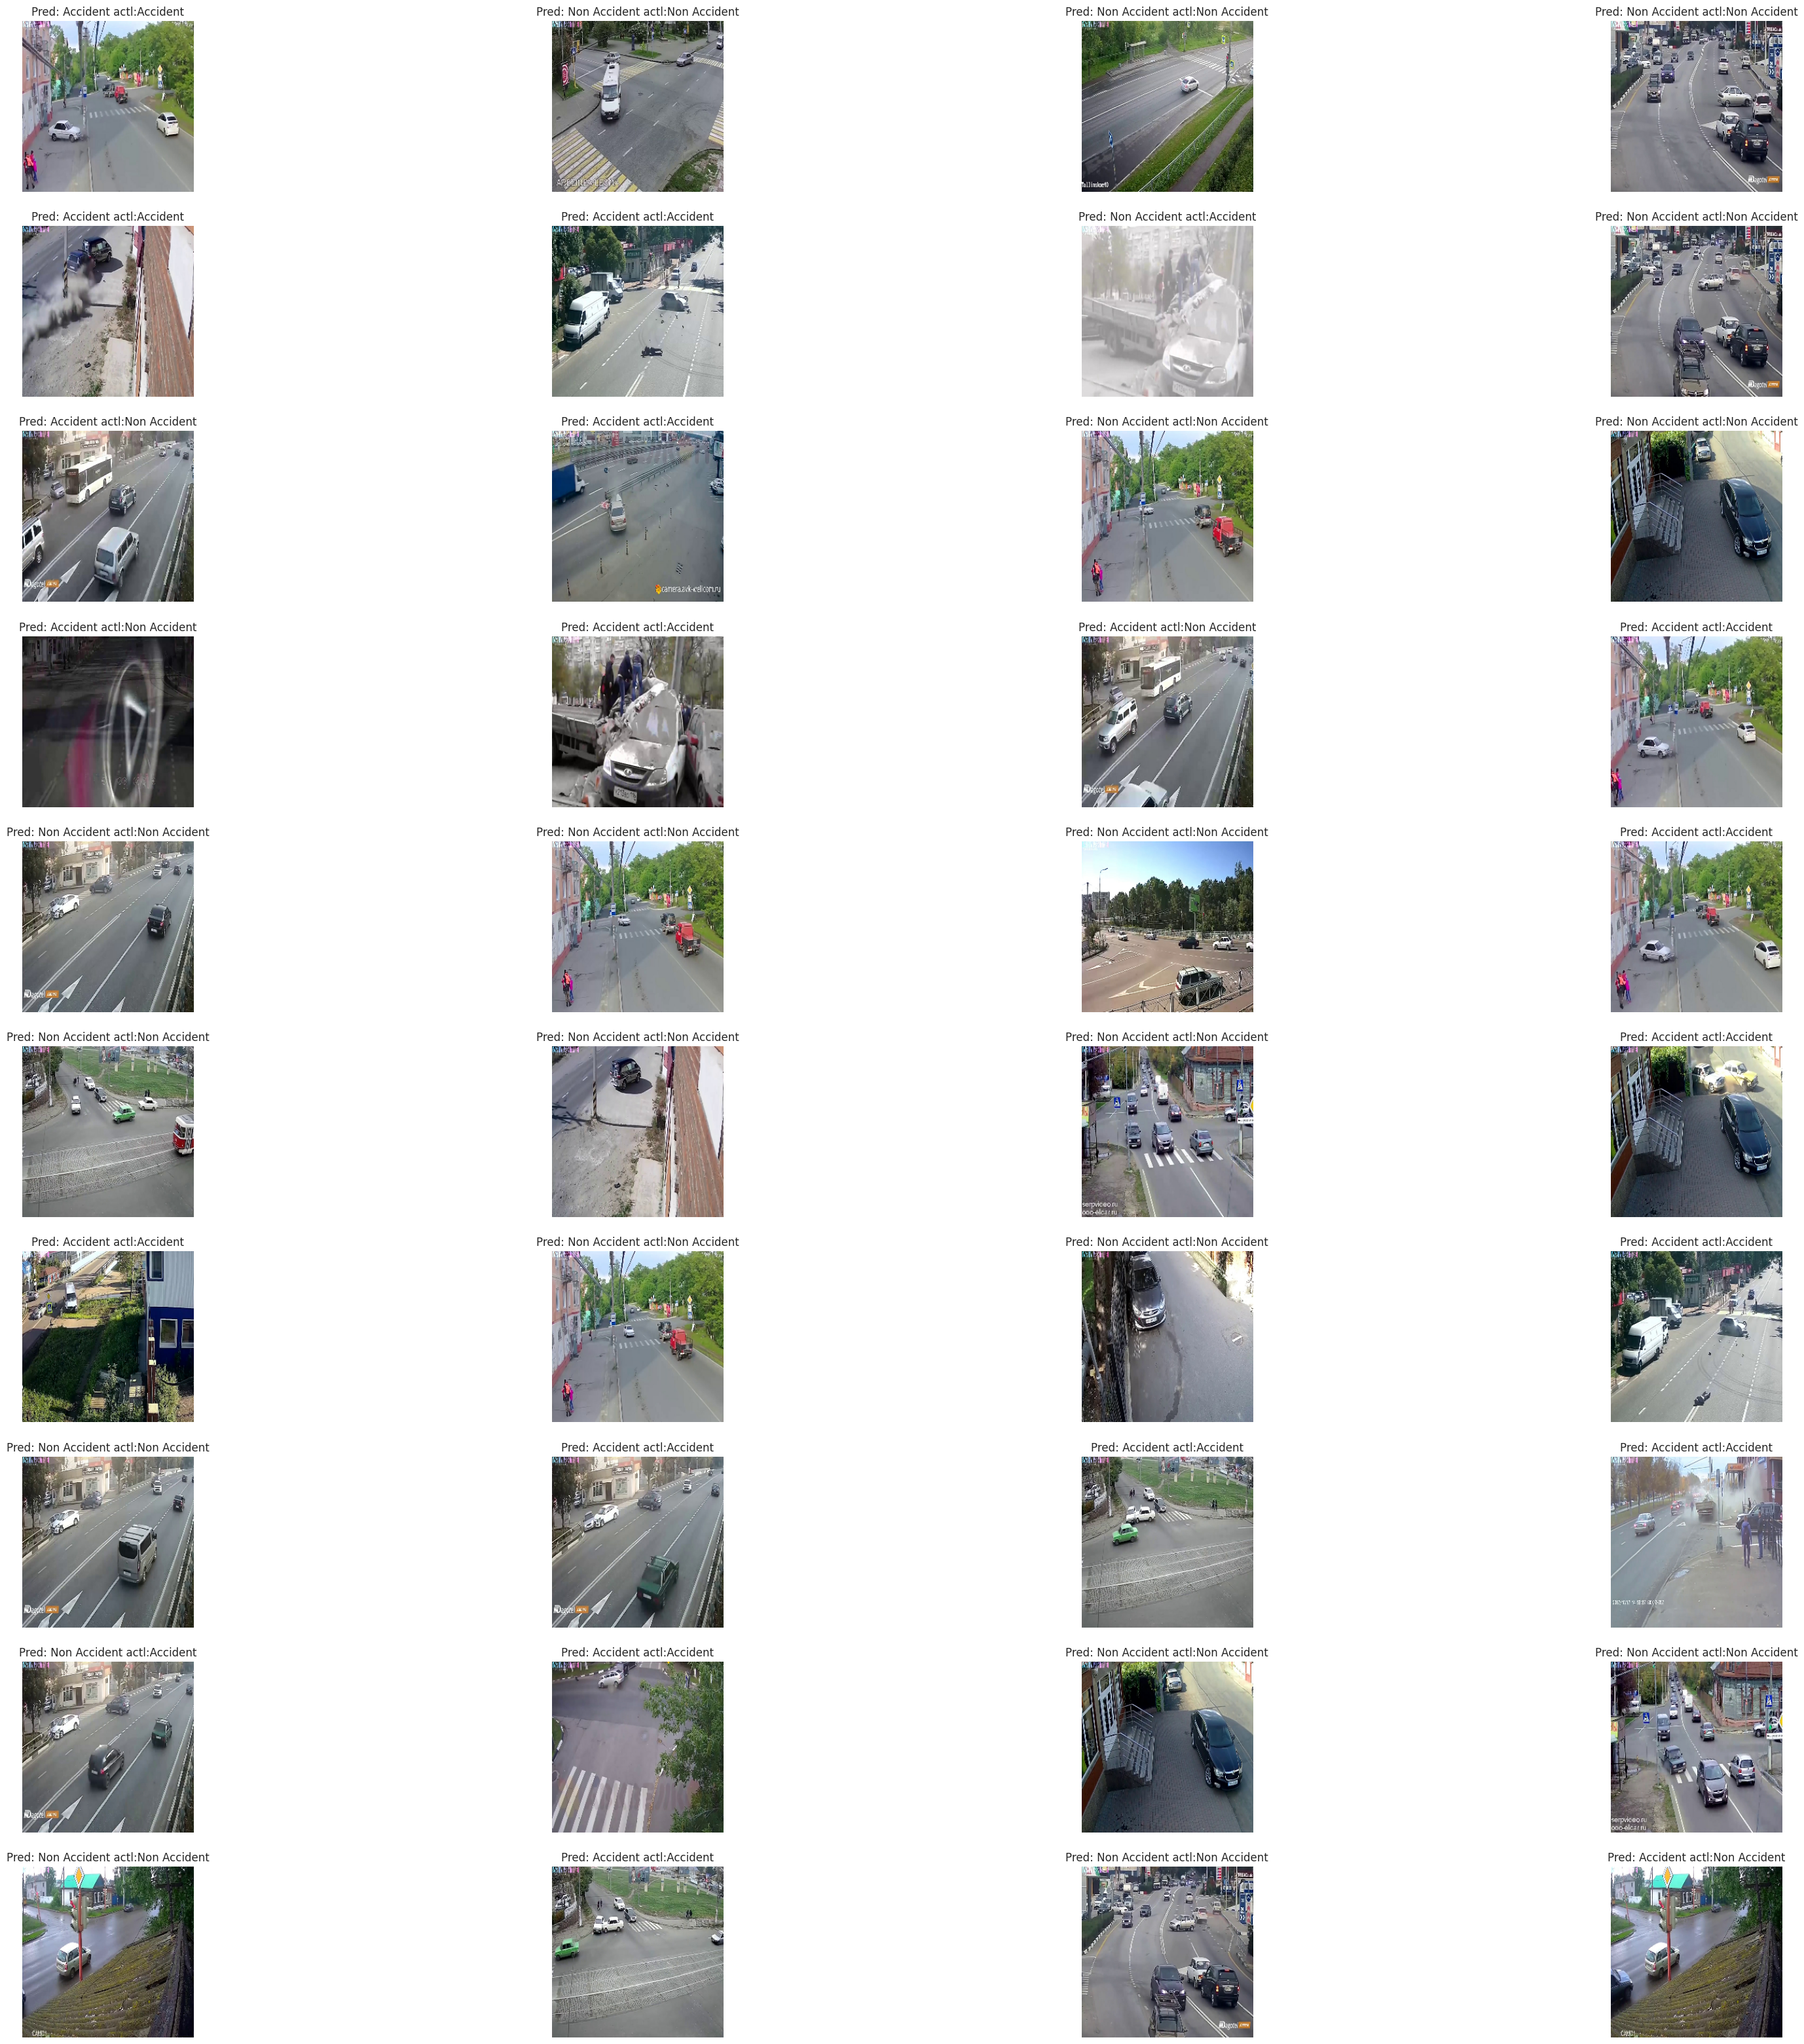

In [ ]:
ccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)